# Matplotlib

In [1]:
%matplotlib notebook  
#make the plot a part of the notebook, must be imported ahead of pyplot

%matplotlib inline 
# use the inline backend in plots

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
# plt.plot
plt.plot(5,5,'o')
plt.show()

# without "%matplotlib notebook" once running the cell, cannot add new items on the plot

<IPython.core.display.Javascript object>


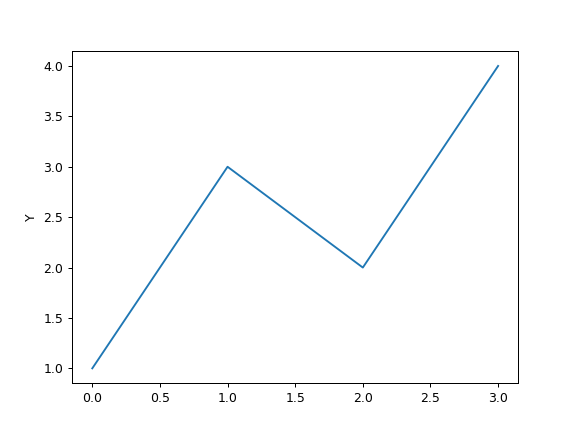

Text(0,0.5,'Y')

In [16]:
plt.ylabel('Y')
# with %matplotlib notebook, new feature will add to the active plot automatically

In [17]:
# plt.plot
plt.plot([1,3,2,4]) # list
plt.show()

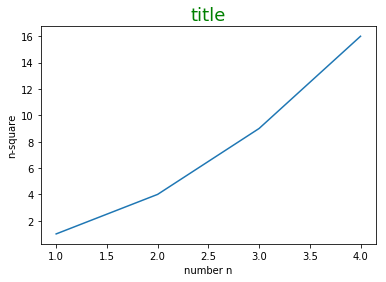

In [4]:
# title & label
plt.plot([1,2,3,4],[1,4,9,16])  # x-axis & y-axis
plt.title('title', fontsize=18, color='g')
plt.xlabel('number n')
plt.ylabel('n-square')
plt.show()

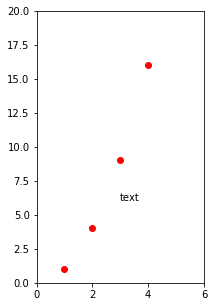

In [9]:
# figure size
plt.figure(figsize=(3,5))     # 3 inch wide * 5 inch tall
plt.plot([1,2,3,4],[1,4,9,16], 'ro')   # red  o: circle shape 
plt.axis([0,6,0,20])                   # [xmin, xmax, ymin, ymax]
plt.annotate('text', (3,6))       # (3,6)   location
plt.show()

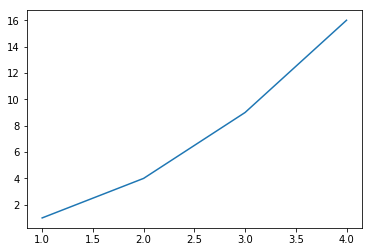

In [5]:
plt.plot([1,2,3,4],[1,4,9,16])

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),     #skip top 20 rows
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
#set column country as index colum
df_can.set_index('Country', inplace=True)

In [15]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
# check available style
print(plt.style.available)

# set to ggplot-like style
mpl.style.use(['ggplot'])

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [7]:
print(type(df_can.columns))
print(type(df_can.index))

#turning years in to list
df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'list'>
<class 'list'>


In [ ]:
#check if the column labels are all string
all(isinstance(column, str) for column in df_can.columns)

In [8]:
# convert the years name into strings from integers
df_can.columns = list(map(str, df_can.columns))

In [16]:
years = list(map(str, range(1980, 2014)))

In [10]:
haiti = df_can.loc['Haiti',years]

In [11]:
haiti.index
print (type(haiti.index))

<class 'pandas.core.indexes.base.Index'>


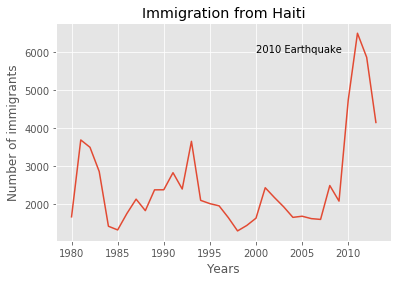

In [12]:
# change the index values of Haiti to type integer for plotting
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(2000, 6000, '2010 Earthquake') # annotate the 2010 Earthquake. 

plt.show() # need this line to show the updates made to the figure

In [13]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [23]:
# get top 5 in total
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5=df_can.head(5)

In [27]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [25]:
# transpose the dataframe (exchange columns and rows)
df_top5=df_top5[years].transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [28]:
# change the index value (year) to integer
df_top5.index=df_top5.index.map(int)

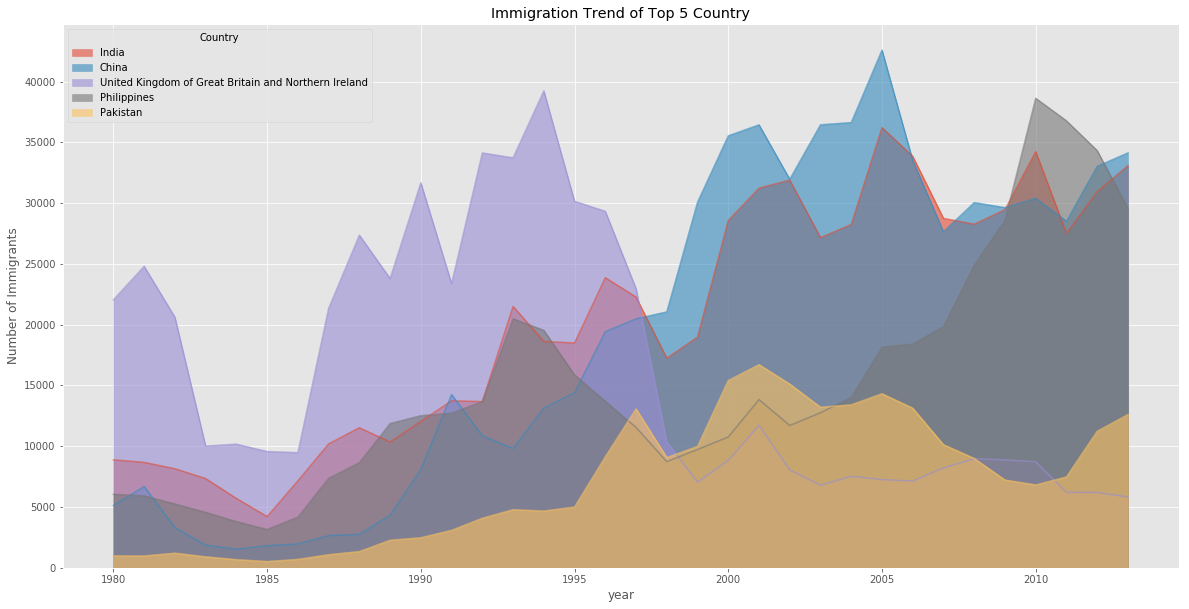

In [33]:
#plot unstacked area plot
df_top5.plot(kind='area',
            stacked=False,
            alpha=0.6,
            figsize=(20,10))
plt.title('Immigration Trend of Top 5 Country')
plt.ylabel('Number of Immigrants')
plt.xlabel('year')

plt.show()